In [ ]:
#Installing required libraries

!pip install mediapipe opencv-python face-recognition pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 86.7 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=ff33bf0eab9ed624f13567c7463ec8c684c057bfc631d29c92fbb908c4b613a5
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=

In [ ]:
from pytube import YouTube  #Using pytube library

def Youtube_download():
    url = "https://www.youtube.com/watch?v=-OPHPlIL5Q4"  #asking for URL input
    yt = YouTube(url)
    print('Fetching title of the Video... ')
    print(yt.title)
    video = yt.streams.get_highest_resolution() #Selecting stream with highest resolution

    print('Downloading...')
    video.download('./downloadedVideo',filename = "ImranKhan.mp4")  #downloading video to path (./downloadedVideo) with name "ImranKhan.mp4"
    print('Successfully Downloaded.')

Youtube_download()

Fetching title of the Video... 
🔴 LIVE l Imran Khan Historic Speech In Long March l PTI Haqeeqi March | Breaking News
Downloading...
Successfully Downloaded.


In [ ]:
# Code for downloading Image for training purposes.

import urllib.request

def download_image(url, file_path, file_name):
    full_path = file_path + file_name + '.jpg'
    urllib.request.urlretrieve(url, full_path)

url = "https://media.gettyimages.com/id/1181277782/photo/the-duke-and-duchess-of-cambridge-visit-islamabad-day-two.jpg?s=594x594&w=gi&k=20&c=AgCo6PWbzx9CLP--YgWTLg2s6HdWyVgmh75OBdsGPB8="
file_name = "ImranKhan"

download_image(url, './content', file_name)

**Note**: This model needed more pictures for training purposes but unfortunately due to lack of time couldn't add more images.


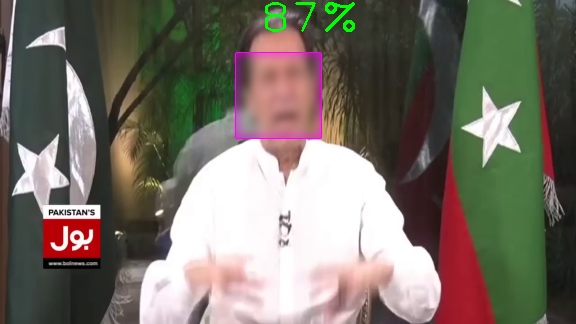

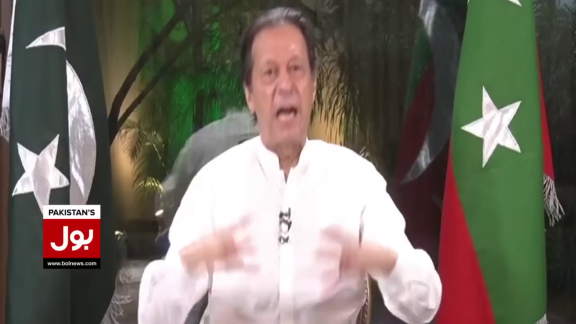

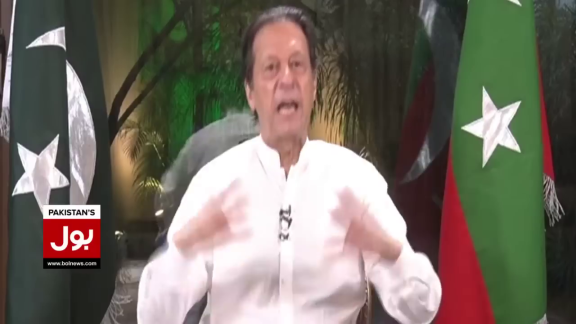

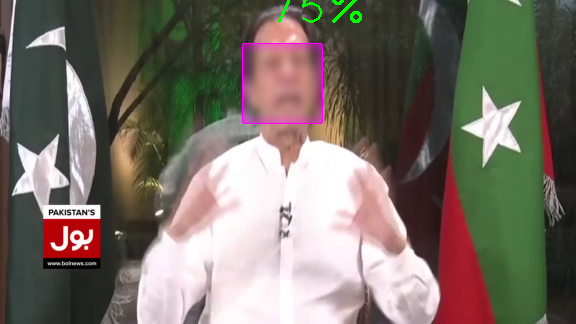

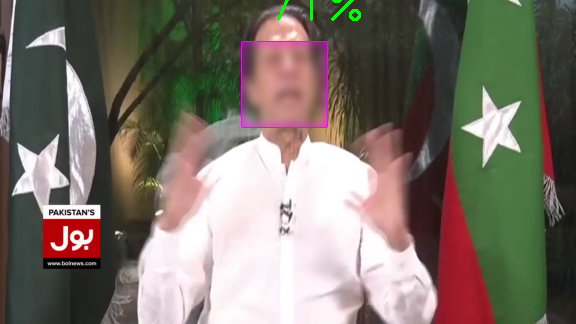

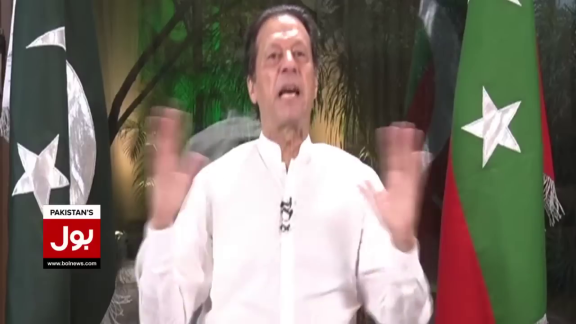

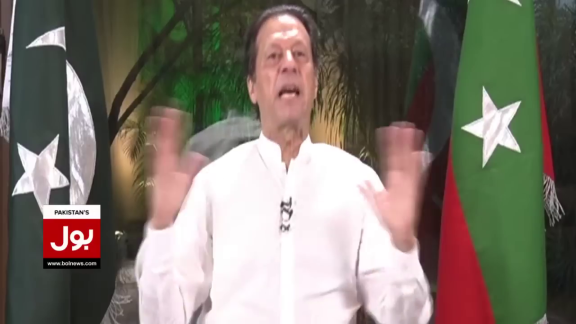

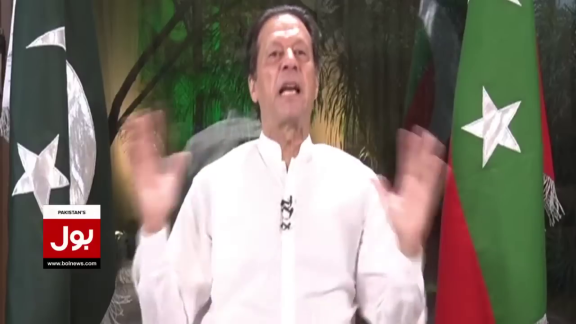

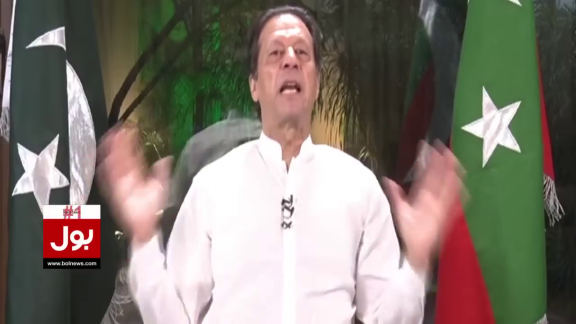

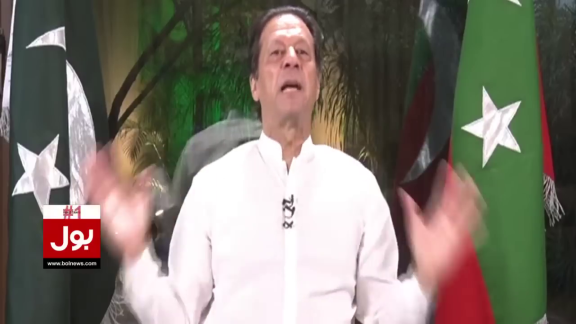

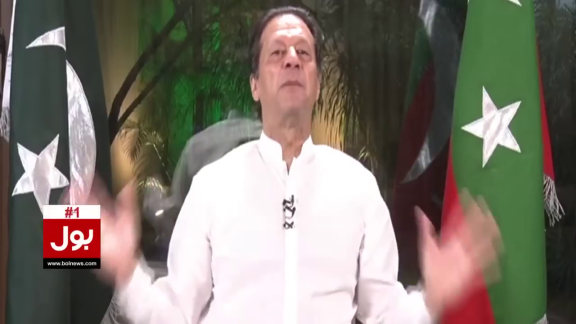

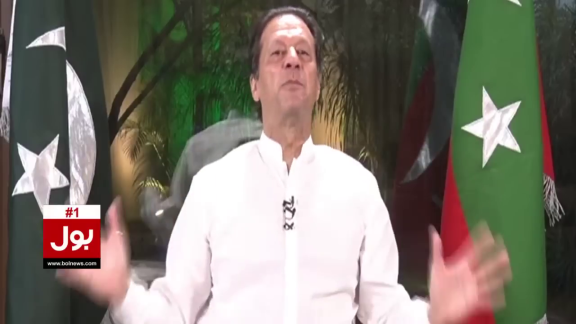

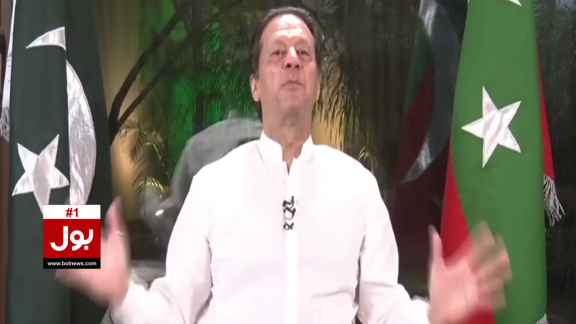

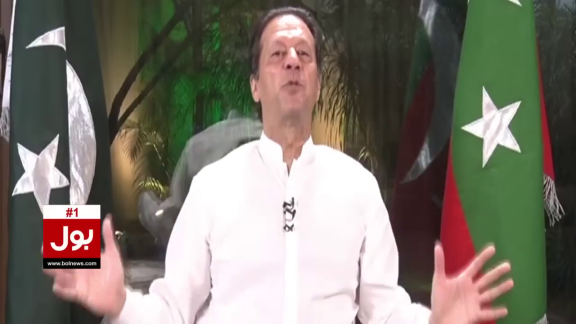

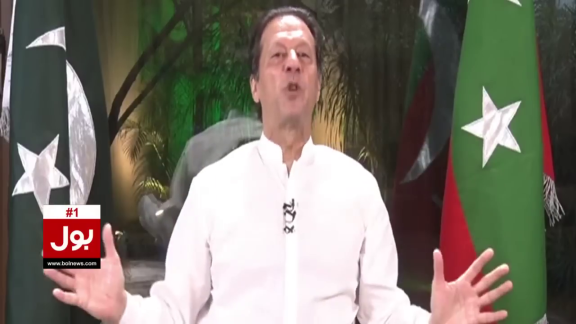

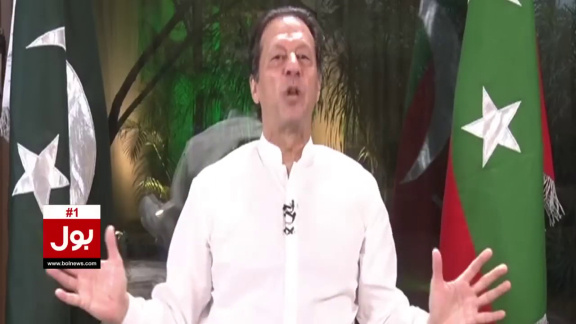

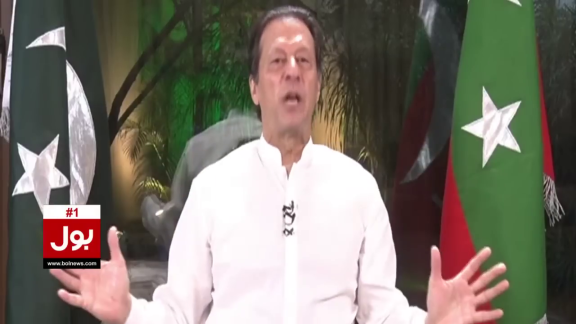

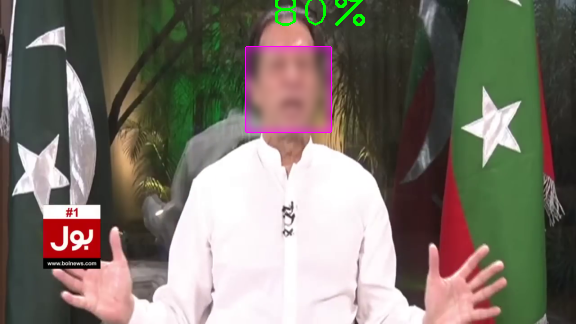

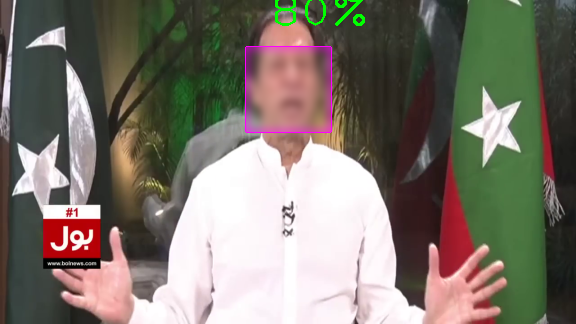

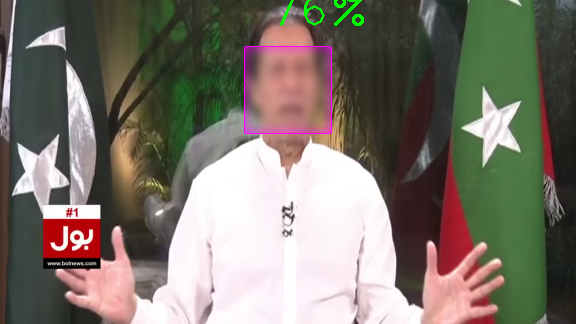

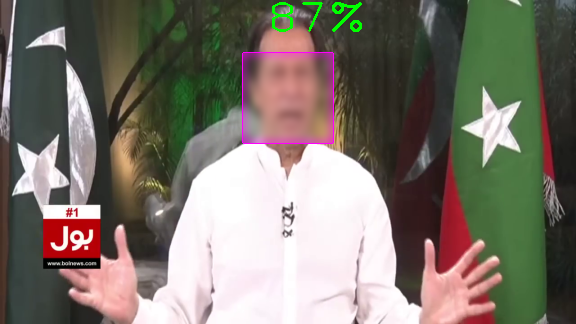

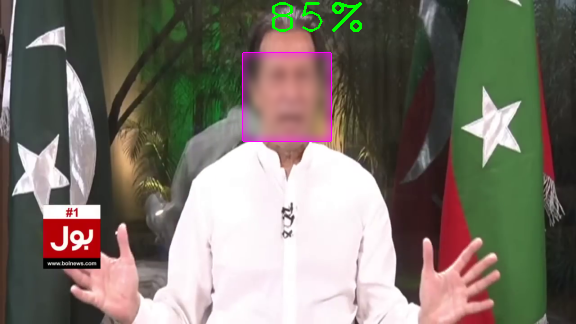

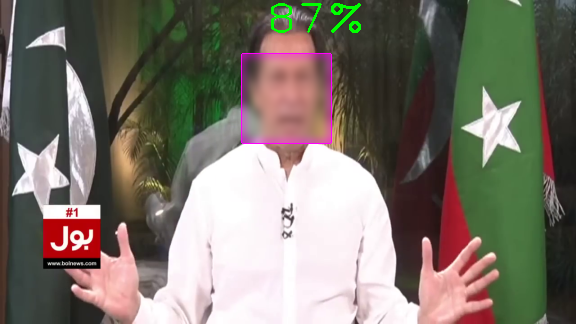

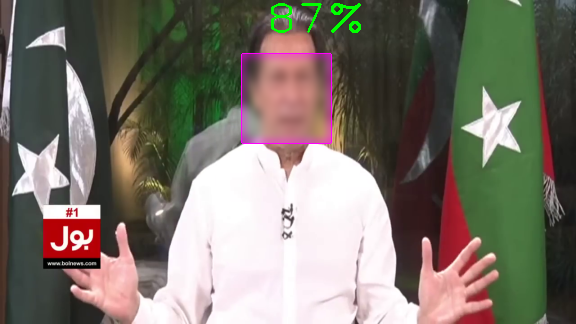

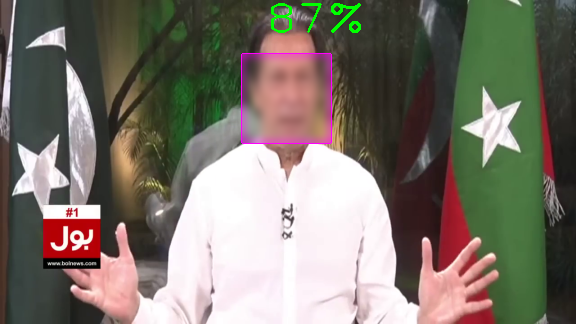

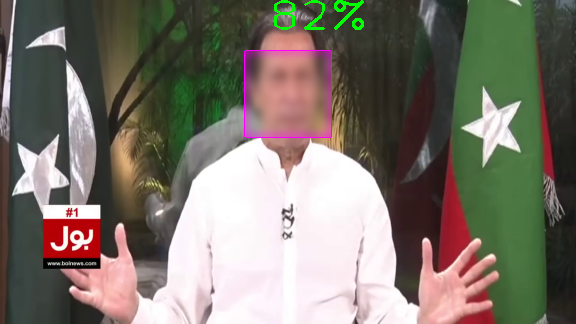

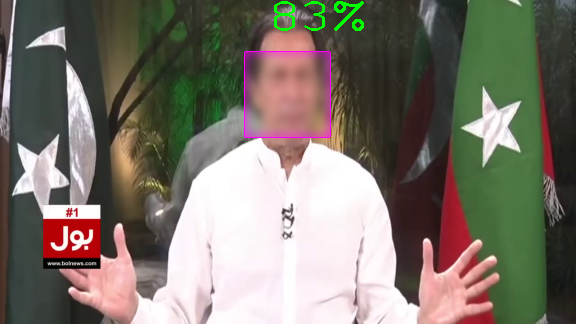

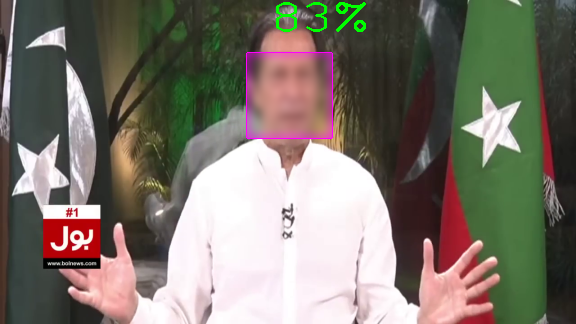

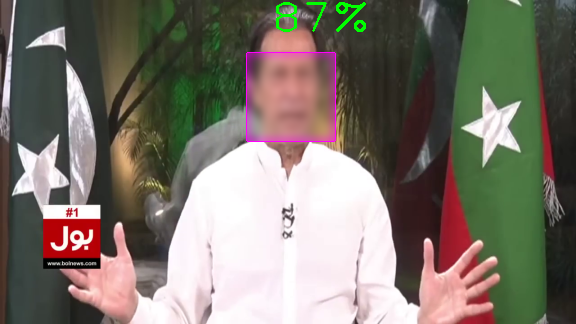

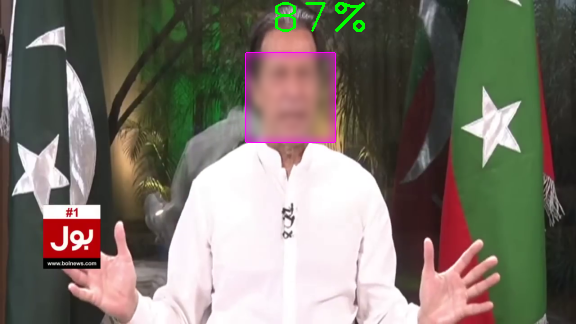

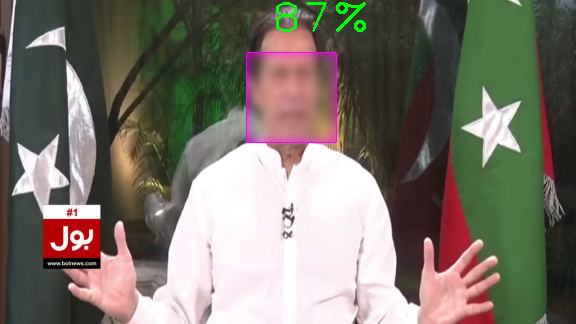

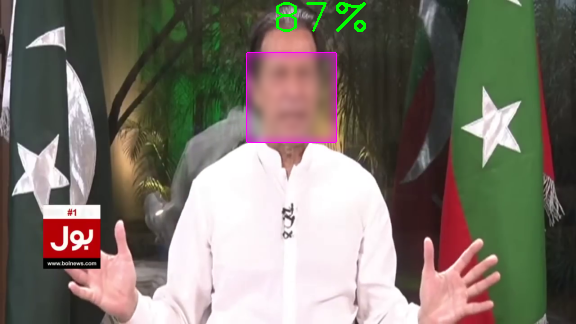

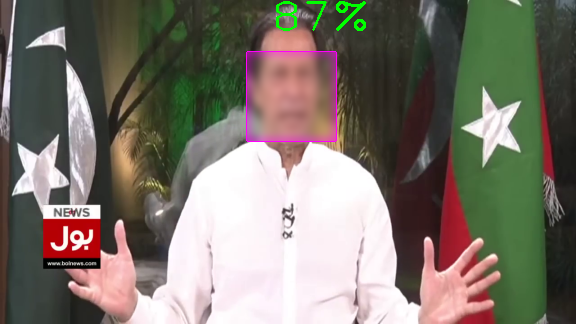

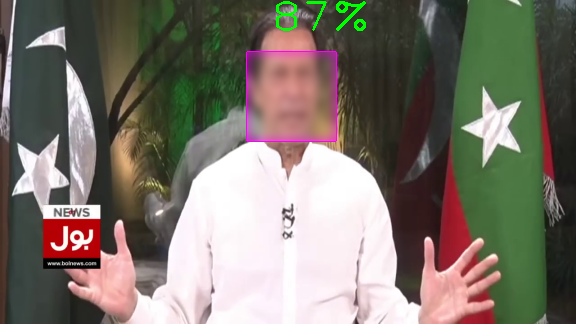

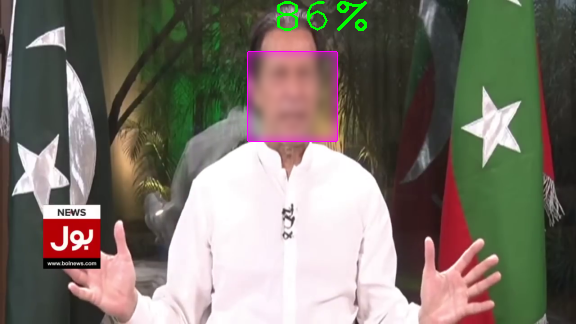

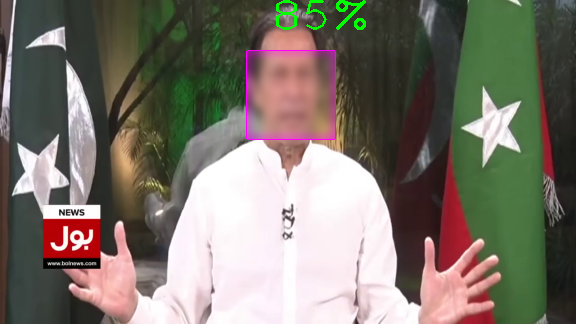

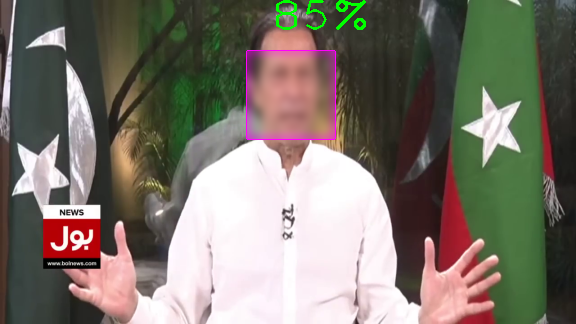

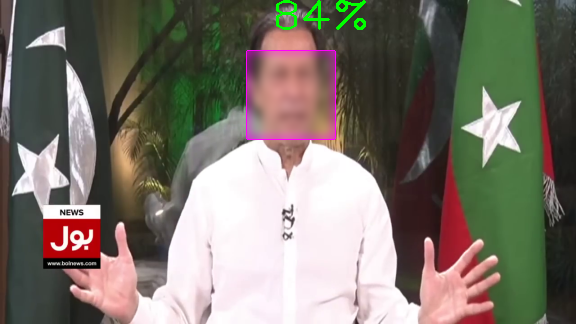

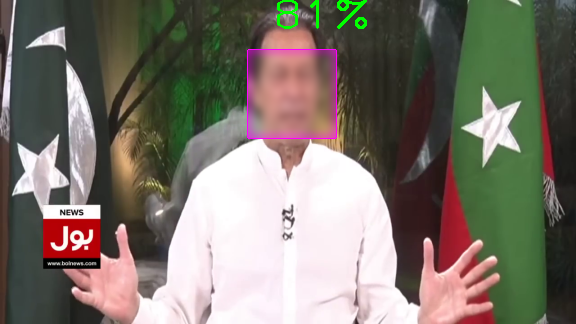

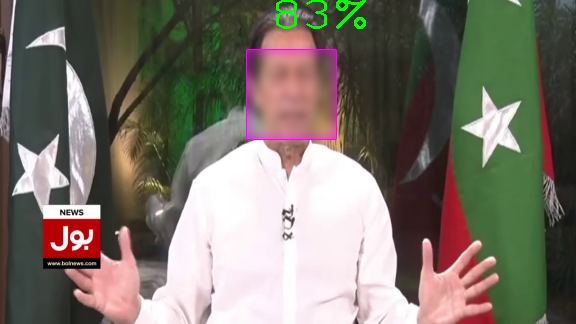

In [ ]:
import cv2
import time
import mediapipe as mp
from google.colab.patches import cv2_imshow
import face_recognition

def rescalling(frame, scale=0.75):  # Func. for resizing
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimension=(width,height)
    return cv2.resize(frame,dimension,interpolation=cv2.INTER_AREA)


training_img = cv2.imread("/content/contentImranKhan.jpg")
rgb_img = cv2.cvtColor(training_img, cv2.COLOR_BGR2RGB)
img_encoding = face_recognition.face_encodings(rgb_img)[0]


#video capturing 
cap = cv2.VideoCapture('./downloadedVideo/ImranKhan.mp4') 
# cap = cv2.VideoCapture(0)  => For Webcam

# pTime = 0
# Face Detection
mpFaceDetection = mp.solutions.face_detection
faceDetection = mpFaceDetection.FaceDetection()

for i in range(0,40): # Because of poor performance of my PC I wasn't able to run whole video So with for loop first 40 frame are analyzed.
# while True:     => If your PC is capable of running then please uncoomment this line and comment out above line.
    success, img = cap.read()
    img= rescalling(img,0.45)
    
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    results = faceDetection.process(imgRGB)

    rgb_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_encoding2 = face_recognition.face_encodings(rgb_img2)[0]
    
    
    if results.detections:
        for id,detection in enumerate(results.detections): 
            # print(id, detection)
            result = face_recognition.compare_faces([img_encoding], img_encoding2)
            if result[0] == True:
              img_height,img_width= img.shape[0],img.shape[1]
              
              boundary_box = detection.location_data.relative_bounding_box
              
              

              bbox = int(boundary_box.xmin*img_width),int(boundary_box.ymin*img_height),\
                  int(boundary_box.width*img_width),int(boundary_box.height*img_height)
              cv2.rectangle(img,bbox,(255,0,255),2)
              
              
              # Face Blurring

              img[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2]] = cv2.GaussianBlur(img[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2]],(99,99),cv2.BORDER_DEFAULT)
              cv2.putText(img,f' {int(detection.score[0]*100)}%',(bbox[0],bbox[1]-20),cv2.FONT_HERSHEY_PLAIN,3,(0,255,0),2)
              

    # cTime = time.time()
    # fps = 1/(cTime-pTime)
    # pTime = cTime
    # cv2.putText(img,f'FPS: {int(fps)}',(20,70),cv2.FONT_HERSHEY_PLAIN,3,(0,255,0),2)
    cv2_imshow(img)
    cv2.waitKey(1)

In [ ]:
# # Code face recognition
# import face_recognition

# img = cv2.imread("/content/contentImranKhan.jpg")
# rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_encoding = face_recognition.face_encodings(rgb_img)[0]


# img2 = cv2.imread("/content/949292_9656676_IKzawal2_akhbar.webp")
# rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img_encoding2 = face_recognition.face_encodings(rgb_img2)[0]

# result = face_recognition.compare_faces([img_encoding], img_encoding2)
# print("Result: ", result, type(result))